## Homework 4 - CSE 276C - Math for Robotics

### Problem 1
In robotics it is typical to have to recognize objects in the environment. We will here use the German Traffic Sign dataset for recognition of traffic signs. You can download the dataset from the link below.

To reduce computational time, please use the file Train subset.csv to read in the train set. Similarly, please use the file Test subset.csv to read in the test set.

Link: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Test.csv

Compute subspaces for the PCA and LDA methods. Provide illustration of the respective 1st and 2nd eigenvectors.

Compute the recognition rates for the test set. Report:
- Correct classification
- Incorrect classification

Provide at least one suggestion for how you might improve performance of each method.


### Solution:

### i.) Principal Component Analysis (PCA) Method with Random Forest Classifier for Image Recognition
1.) Import all the libraries that will be used.

In [1]:
# Import necessary libraries
import cv2
import math
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

2.) Load and store the "Train_subset.csv" and "Test_subset.csv" data as a dataframe.

In [2]:
# Read the subset of the train data.
train_subset_df = pd.read_csv('Train_subset.csv')

# Read the subset of the test data.
test_subset_df = pd.read_csv('Test_subset.csv')

3.) Observe how the "Test" dataframe and "Train" dataframe look like, and check whether the data are stored correctly. Print data information/statistics.

In [3]:
# First few number of row to print.
num_Row = 6

# Print the train dataframe to observe how they look like.
train_subset_df.head(num_Row)

,Unnamed: 0,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,19138,92,93,8,8,84,85,12,Train/12/00012_00025_00028.png
1,21703,70,61,7,6,64,56,13,Train/13/00013_00041_00013.png
2,32087,62,58,5,6,57,53,31,Train/31/00031_00000_00017.png
3,19762,47,49,6,6,42,44,12,Train/12/00012_00046_00022.png
4,13970,57,56,6,5,51,51,9,Train/9/00009_00013_00020.png
5,32376,32,31,5,6,27,26,31,Train/31/00031_00010_00006.png


In [4]:
# Print the train dataframe statistics.
train_subset_df.describe()

,Unnamed: 0,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,19661.150900,50.530100,49.988800,5.971900,5.941700,44.91260,44.41200,15.852400
std,11317.849831,23.790807,22.627967,1.438651,1.351623,22.59473,21.52965,12.002751
min,4.000000,25.000000,25.000000,4.000000,5.000000,20.00000,20.00000,0.000000
25%,9894.750000,34.000000,34.000000,5.000000,5.000000,29.00000,29.00000,5.000000
50%,19762.500000,43.000000,43.000000,6.000000,6.000000,38.00000,38.00000,12.000000
75%,29507.500000,58.000000,57.000000,6.000000,6.000000,53.00000,52.00000,25.000000
max,39208.000000,230.000000,203.000000,20.000000,18.000000,211.00000,186.00000,42.000000


In [5]:
# Print the test dataframe to observe how they look like.
test_subset_df.head(num_Row)

,Unnamed: 0,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,6659,53,49,5,6,48,44,25,Test/06659.png
1,7633,44,42,5,6,39,37,11,Test/07633.png
2,1678,34,36,6,6,28,30,38,Test/01678.png
3,5938,38,42,5,6,33,37,38,Test/05938.png
4,11949,49,50,5,6,44,45,8,Test/11949.png
5,9991,34,36,6,5,29,30,38,Test/09991.png


In [6]:
# Print the train dataframe statistics.
test_subset_df.describe()

,Unnamed: 0,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6340.731200,50.371000,50.21100,5.983000,5.963200,44.736000,44.610400,15.489600
std,3631.595137,25.191298,23.72901,1.557433,1.443559,23.871512,22.518899,11.983347
min,5.000000,25.000000,25.00000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,3169.000000,34.000000,35.00000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,6435.000000,43.000000,43.00000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,9463.250000,58.000000,57.00000,6.000000,6.000000,52.000000,52.000000,25.000000
max,12629.000000,260.000000,229.00000,22.000000,19.000000,244.000000,210.000000,42.000000


4.) Store training and testing images and Class ID into respective lists.

In [7]:
# List that stores train images
train_imgs = []
# List that store train class ID
train_IDs = []
# List that stores test images
test_imgs = []
# List that store test class ID
test_IDs = []

# Size of the image,
img_size = 25

# Store train images into the train images list
for idx in range(0, len(train_subset_df)):
    
    # Load image
    img = cv2.imread(train_subset_df['Path'][idx], cv2.IMREAD_COLOR)
    # Resize the image to 25 x 25 because the minimum width of the images are 25 x 25
    img = cv2.resize(img, (img_size, img_size))
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Add to train images list
    train_imgs.append(img)
    
    # Get the ClassID
    train_class_ID = train_subset_df['ClassId'][idx]
    # Add to train ID list
    train_IDs.append(train_class_ID)
    
# Store test images into the test images list
for idx in range(0, len(test_subset_df)):
    
    # Load image
    img = cv2.imread(test_subset_df['Path'][idx], cv2.IMREAD_COLOR)
    # Resize the image to 25 x 25 because the minimum width of the images are 25 x 25
    img = cv2.resize(img, (img_size, img_size))
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Add to train images list
    test_imgs.append(img)
    
    # Get the ClassID
    test_class_ID = test_subset_df['ClassId'][idx]
    # Add to train ID list
    test_IDs.append(test_class_ID)
    
## Convert the lists to arrays
# Train images and IDs arrays
train_imgs = np.array(train_imgs)
train_IDs = np.array(train_IDs)
#train_IDs = train_IDs.reshape(train_IDs.shape[0], 1)
# Test images and IDs arrays
test_imgs = np.array(test_imgs)
test_IDs = np.array(test_IDs)
#test_IDs = test_IDs.reshape(test_IDs.shape[0], 1)

# Print to check the shape of the arrays
print("Train Image Array Shape: ", train_imgs.shape)
print("Train IDs Array Shape: ", train_IDs.shape)
print("Test Image Array Shape: ", test_imgs.shape)
print("Train IDs Array Shape: ", test_IDs.shape)

print("\n----------------------------------------------\n")

# Print the total number of different traffic signs
class_IDs = np.unique(train_IDs)
nClasses = len(class_IDs)
print("Total Number of Different Traffic Signs: ", nClasses)
print("Traffic Sign IDs: ", class_IDs)

Train Image Array Shape:  (10000, 25, 25)
Train IDs Array Shape:  (10000,)
Test Image Array Shape:  (5000, 25, 25)
Train IDs Array Shape:  (5000,)

----------------------------------------------

Total Number of Different Traffic Signs:  43
Traffic Sign IDs:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


5.) Scale or normalize the train and test images pixel values in between 0 and 1.

In [8]:
# Normalize the train and test images pixel values.
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

6.) Reshape the train images dimensions from (Number of Images, $N_{imgs}$ $\times$ Height of the Image, $H$ $\times$ Width of the Image, $W$) to ($N_{imgs}$ $\times$ $HW$).

In [9]:
# Flatten the train images.
train_imgs_flatten = train_imgs.flatten().reshape(train_imgs.shape[0], img_size*img_size)

# Flatten the test images.
test_imgs_flatten = test_imgs.flatten().reshape(test_imgs.shape[0], img_size*img_size)

print("Flatten Train Images Shape: ", train_imgs_flatten.shape)
print("Flatten Test Images Shape: ", test_imgs_flatten.shape)

Flatten Train Images Shape:  (10000, 625)
Flatten Test Images Shape:  (5000, 625)


7.) Perform PCA method with the sklearn library to compress data.

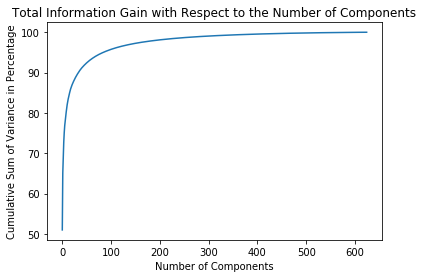

Number of Components Needed to Capture 96% of the Information:  108


In [10]:
# Determine the maximum number of components
n_Samples = train_imgs_flatten.shape[0] # Number of Samples
n_Features = train_imgs_flatten.shape[1] # Number of Features

# If the number of samples is more than the number of Features.
if n_Samples <= n_Features:
    
    # Maximum of the number of components is the number of samples - 1.
    max_n_components = n_Samples - 1
    
else:
    
    # Maximum of the number of components is the total number of features.
    max_n_components = img_size*img_size

## Plot the total information gains with respect to the number of components.
# Create the PCA object.
pca = PCA(n_components = max_n_components)
# Fit the flatten train images array
pca.fit(train_imgs_flatten)
# Plot the graph
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
# Include title of the graph
plt.title("Total Information Gain with Respect to the Number of Components")
# Label x-axis
plt.xlabel("Number of Components")
# Label y-axis
plt.ylabel("Cumulative Sum of Variance in Percentage")
# Show plot
plt.show()

# Select the number of components that contains 96% of the variance or 0.96 variance
variance_num = 0.96
# Create the PCA object.
pca = PCA(variance_num)
# Fit the flatten train images array
pca.fit(train_imgs_flatten)
# Print the total number of components need to get 96% of the variance
num_PCA_components = pca.n_components_
print("Number of Components Needed to Capture 96% of the Information: ", num_PCA_components)

# Create the PCA object
pca = PCA(n_components = num_PCA_components)
# Fit and transform train images
x_train = pca.fit_transform(train_imgs_flatten)
# Transform test images
x_test = pca.transform(test_imgs_flatten)

8.) Provide illustration of the respective 1st and 2nd eigenvectors.

PCA's 1st Eigenvector:
 [0.04672869 0.04722522 0.0477394  0.04814982 0.0480401  0.04833528
 0.04843048 0.04838607 0.04776281 0.04662202 0.0457755  0.04434811
 0.04341673 0.04440314 0.04582263 0.04689159 0.04734314 0.04761885
 0.0479059  0.04792918 0.0480634  0.04825382 0.04782014 0.04725342
 0.04651578 0.04719962 0.04780766 0.04821571 0.04860554 0.04852101
 0.04878519 0.04899623 0.0488187  0.04857497 0.04770112 0.04660279
 0.04510817 0.04374004 0.04490786 0.04631801 0.04727816 0.04808413
 0.04842625 0.04822143 0.04834036 0.0484686  0.04817547 0.04798324
 0.04729098 0.04668859 0.04764603 0.04808231 0.04852513 0.04878684
 0.04868844 0.04894196 0.04934266 0.04936477 0.04936685 0.04867622
 0.04732229 0.04589013 0.0445565  0.04566276 0.04697191 0.04765082
 0.0481743  0.04815966 0.04806122 0.04833981 0.04835577 0.04821319
 0.04772706 0.0473538  0.04686403 0.04737608 0.04791117 0.0481224
 0.04862475 0.04873782 0.04917829 0.04918229 0.04958764 0.04901582
 0.04732689 0.0449268  0.04144551 0.040

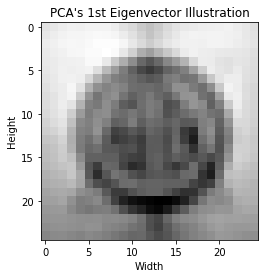

In [11]:
# Get the first and second eigenvectors
first_eigenVector = pca.components_[0]
second_eigenVector = pca.components_[1]

# Illustrate the 1st Eigenvector of PCA
print("PCA's 1st Eigenvector:\n", first_eigenVector)
plt.title("PCA's 1st Eigenvector Illustration")
plt.xlabel("Width")
plt.ylabel("Height")
plt.imshow(first_eigenVector.reshape((img_size, img_size)), cmap ='gray')
plt.show()


PCA's 2nd Eigenvector:
 [ 0.04897201  0.04936645  0.04923463  0.04983891  0.04952082  0.0480383
  0.04640888  0.04417447  0.04178622  0.03680512  0.02995201  0.02260445
  0.01948271  0.02211666  0.03018846  0.03502242  0.03882105  0.04103913
  0.04219225  0.04336432  0.04447479  0.04533673  0.04565435  0.04510694
  0.04457517  0.04851385  0.04899113  0.04901221  0.04926246  0.04913951
  0.04845858  0.0464944   0.04480837  0.04247827  0.03885763  0.03155188
  0.02174544  0.01619792  0.02066156  0.03029374  0.03666696  0.03945994
  0.04137537  0.04322464  0.04398183  0.04504924  0.04602445  0.04530535
  0.04476355  0.04382245  0.04879333  0.0488048   0.04869017  0.04911163
  0.04928023  0.04803755  0.04681178  0.04508667  0.0425819   0.03828939
  0.02973498  0.01502237  0.00441508  0.01080391  0.02621     0.0353681
  0.03980659  0.04208305  0.0436245   0.04406601  0.04549113  0.04572239
  0.04571426  0.0452752   0.04433165  0.04866496  0.0488444   0.0490718
  0.04851808  0.048282    0.04

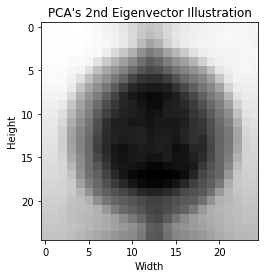

In [12]:
# Illustrate the 2nd Eigenvector of PCA
print("PCA's 2nd Eigenvector:\n", second_eigenVector)
plt.title("PCA's 2nd Eigenvector Illustration")
plt.xlabel("Width")
plt.ylabel("Height")
plt.imshow(second_eigenVector.reshape((img_size, img_size)), cmap ='gray')
plt.show()

**PCA Eigenvectors Explanation:**<br>
The PCA eigenvectors are the principal components from the training images, which are images of a traffic sign. Each traffic sign is also a weighted combination of the eigen images as illustrated above.

9.) Apply Random Forest Classification to perform image recognition.

In [13]:
# Create Random Forest Classifier Object
RF_classifier = RandomForestClassifier()

# Fit the flatten train images with the train IDs
RF_classifier.fit(x_train, train_IDs)

# Predict the test set outcomes.
y_predict = RF_classifier.predict(x_test)

10.) Compute the PCA recognition rates for the test set to report correct classification and incorrect classification.

Confusion Matrix: 

 [[  0  14   4 ...   0   0   0]
 [  0 176  45 ...   0   0   0]
 [  0  45 153 ...   0   0   0]
 ...
 [  0  15   1 ...   1   0   0]
 [  0   0   0 ...   0   9   0]
 [  0   2   0 ...   0   5   6]]


Classfication Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.35      0.60      0.44       291
           2       0.38      0.53      0.44       287
           3       0.31      0.29      0.30       174
           4       0.49      0.63      0.55       285
           5       0.35      0.44      0.39       234
           6       0.69      0.56      0.62        66
           7       0.50      0.41      0.45       185
           8       0.58      0.44      0.50       183
           9       0.80      0.71      0.75       191
          10       0.74      0.84      0.79       257
          11       0.50      0.72      0.59       165
          12       0.57      0.86      0.69       281
   

/Users/kaitheuser/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


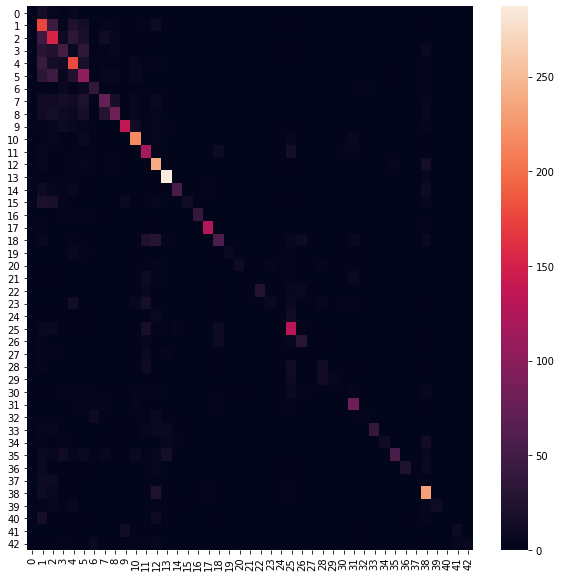

In [14]:
# Plot Confusion Matrix
Confusion_Matrix = confusion_matrix(test_IDs, y_predict)
print("Confusion Matrix: \n\n", Confusion_Matrix)

# Show Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Confusion_Matrix)

# Print Classification Report
print("\n\nClassfication Report: \n\n",classification_report(test_IDs,y_predict))

In [15]:
# Total Number of Test Images
total_num_test_imgs = np.sum(Confusion_Matrix)
# Total Number of Correct Classification
tot_num_correct_classification = np.trace(Confusion_Matrix)
# Total Number of Incorrect Classification
tot_num_incorrect_classification = total_num_test_imgs - tot_num_correct_classification

# Print Recognition Rate Report
print('Total Number of Test Images: ', total_num_test_imgs)
print("Total Number of Correct Classifications: ", tot_num_correct_classification)
print("Total Number of Incorrect Classifications: ", tot_num_incorrect_classification)
print('\nAccuracy Score: ' + str(accuracy_score(test_IDs, y_predict)*100) + ' %')

Total Number of Test Images:  5000
Total Number of Correct Classifications:  2847
Total Number of Incorrect Classifications:  2153

Accuracy Score: 56.940000000000005 %


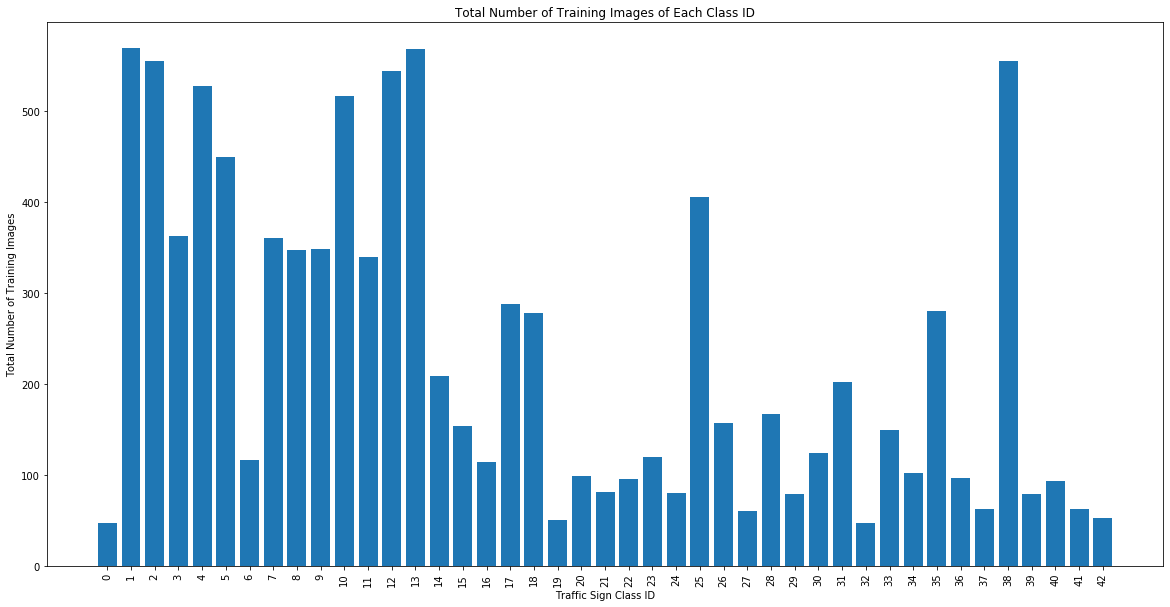

In [16]:
class_IDs_freq = np.zeros((1, nClasses))

# Store train images into the train images list
for idx in range(0, len(train_subset_df)):
    
    # Get the ClassID
    train_class_ID = train_subset_df['ClassId'][idx]
    # Count the numbers of different Class ID
    class_IDs_freq[0, train_class_ID] = class_IDs_freq[0, train_class_ID] + 1

plt.figure(figsize=(20,10))
plt.title('Total Number of Training Images of Each Class ID')
plt.ylabel('Total Number of Training Images')
plt.xlabel('Traffic Sign Class ID')
plt.bar(class_IDs, class_IDs_freq[0])
plt.xticks(class_IDs, rotation='vertical')
plt.show()


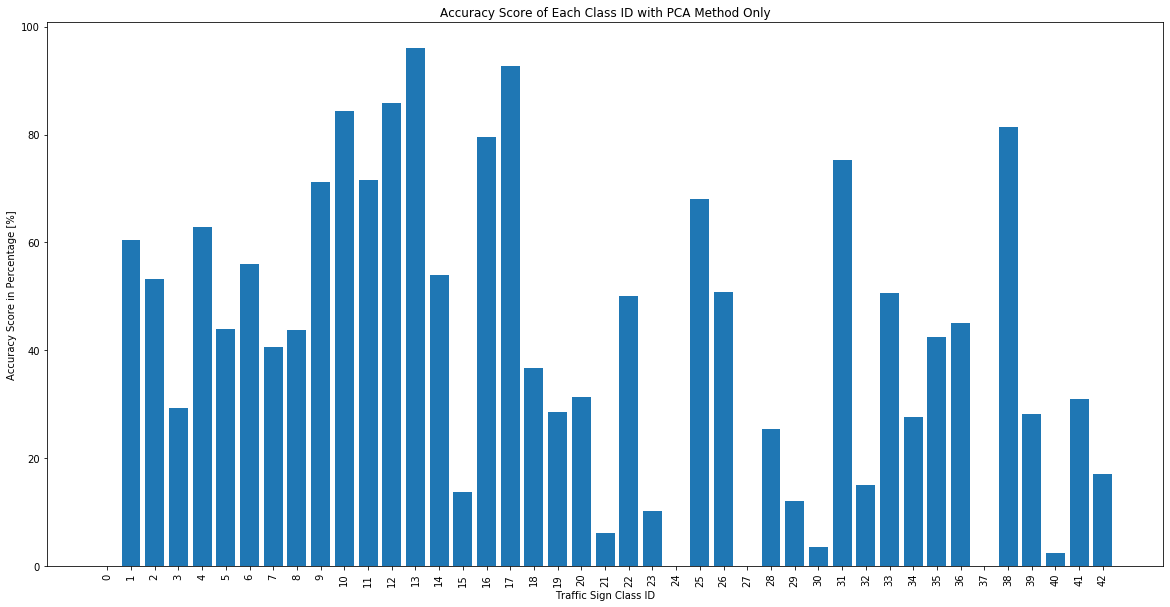

In [17]:
class_IDs_accuracy_score = np.zeros((1, nClasses))

# Calculate the correct classification percentage of each class
for idx in range(0, Confusion_Matrix.shape[0]):
    
    # Get the the sum of Class IDs
    sum_of_IDs = np.sum(Confusion_Matrix[idx,:])
    
    # Get the accuracy score in percentage
    class_IDs_accuracy_score[0, idx] = Confusion_Matrix[idx,idx] / sum_of_IDs * 100

plt.figure(figsize=(20,10))
plt.title('Accuracy Score of Each Class ID with PCA Method Only')
plt.ylabel('Accuracy Score in Percentage [%]')
plt.xlabel('Traffic Sign Class ID')
plt.bar(class_IDs, class_IDs_accuracy_score[0])
plt.xticks(class_IDs, rotation='vertical')
plt.show()

**Suggestion to Improve the PCA Recognition Rate**

According to the Total Number of Training Images of Each Class ID bar graph and the Accuracy Score of Each Class ID with PCA Method Only bar graph, the higher the number of the training images of a traffic sign class ID as shown above, the better the accuracy score of a traffic sign class ID. Hence, one of the suggestions to improve the recognition rate of the PCA is to increase the number of training images of certain class IDs that have a lower percentage of correct classification. Besides that, increases the number of components of PCA or increase the PCA variance could help to improve the PCA recognition rate, for example, as shown in the result below, increase the PCA number of components by 32 has helped to improve the overall accuracy score by 1.2 %.

Number of Components Needed to Capture 97% of the Information:  140
Confusion Matrix: 

 [[  0  10   7 ...   0   0   0]
 [  0 185  46 ...   0   0   0]
 [  0  30 179 ...   0   0   0]
 ...
 [  0  15   1 ...   0   0   0]
 [  0   0   0 ...   0   9   0]
 [  0   2   0 ...   0   3   9]]


Classfication Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.40      0.64      0.49       291
           2       0.39      0.62      0.48       287
           3       0.34      0.30      0.32       174
           4       0.52      0.67      0.58       285
           5       0.33      0.41      0.36       234
           6       0.69      0.56      0.62        66
           7       0.55      0.47      0.51       185
           8       0.59      0.45      0.51       183
           9       0.80      0.69      0.74       191
          10       0.72      0.91      0.81       257
          11       0.51      0.72      0.59

/Users/kaitheuser/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


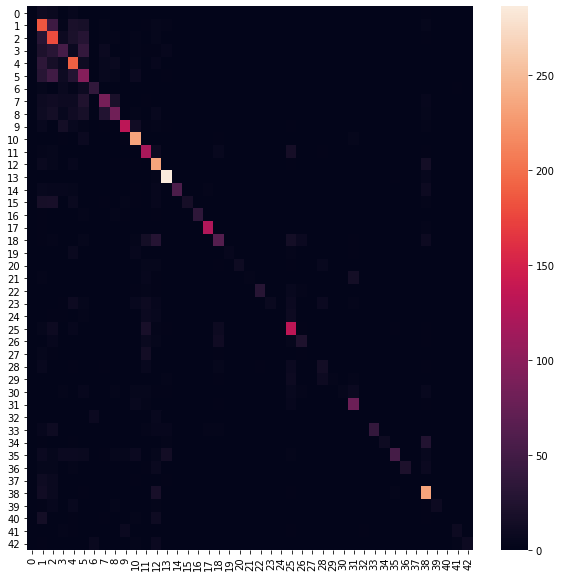

In [33]:
# Select the number of components that contains 97% of the variance or 0.97 variance
variance_num = 0.97
# Create the PCA object.
pca = PCA(variance_num)
# Fit the flatten train images array
pca.fit(train_imgs_flatten)
# Print the total number of components need to get 97% of the variance
num_PCA_components = pca.n_components_
print("Number of Components Needed to Capture 97% of the Information: ", num_PCA_components)

# Create the PCA object
pca = PCA(n_components = num_PCA_components)
# Fit and transform train images
x_train = pca.fit_transform(train_imgs_flatten)
# Transform test images
x_test = pca.transform(test_imgs_flatten)

# Create Random Forest Classifier Object
RF_classifier = RandomForestClassifier()

# Fit the flatten train images with the train IDs
RF_classifier.fit(x_train, train_IDs)

# Predict the test set outcomes.
y_predict = RF_classifier.predict(x_test)

# Plot Confusion Matrix
Confusion_Matrix = confusion_matrix(test_IDs, y_predict)
print("Confusion Matrix: \n\n", Confusion_Matrix)

# Show Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Confusion_Matrix)

# Print Classification Report
print("\n\nClassfication Report: \n\n",classification_report(test_IDs,y_predict))

# Total Number of Test Images
total_num_test_imgs = np.sum(Confusion_Matrix)
# Total Number of Correct Classification
tot_num_correct_classification = np.trace(Confusion_Matrix)
# Total Number of Incorrect Classification
tot_num_incorrect_classification = total_num_test_imgs - tot_num_correct_classification

# Print Recognition Rate Report
print('Total Number of Test Images: ', total_num_test_imgs)
print("Total Number of Correct Classifications: ", tot_num_correct_classification)
print("Total Number of Incorrect Classifications: ", tot_num_incorrect_classification)
print('\nAccuracy Score: ' + str(accuracy_score(test_IDs, y_predict)*100) + ' %')

### ii.) Combination of PCA and Linear Discriminant Analysis (LDA) Methods for Dimensionality Reduction with Random Forest Classification for Image Recognition
1.) Import all the libraries that will be used.

In [19]:
# Import necessary libraries
import cv2
import math
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

2.) Load and store the "Train_subset.csv" and "Test_subset.csv" data as a dataframe.

In [20]:
# Read the subset of the train data.
train_subset_df = pd.read_csv('Train_subset.csv')

# Read the subset of the test data.
test_subset_df = pd.read_csv('Test_subset.csv')

3.) Store training and testing images and Class ID into respective lists.

In [21]:
# List that stores train images
train_imgs = []
# List that store train class ID
train_IDs = []
# List that stores test images
test_imgs = []
# List that store test class ID
test_IDs = []

# Size of the image,
img_size = 25

# Store train images into the train images list
for idx in range(0, len(train_subset_df)):
    
    # Load image
    img = cv2.imread(train_subset_df['Path'][idx], cv2.IMREAD_COLOR)
    # Resize the image to 25 x 25 because the minimum width of the images are 25 x 25
    img = cv2.resize(img, (img_size, img_size))
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Add to train images list
    train_imgs.append(img)
    
    # Get the ClassID
    train_class_ID = train_subset_df['ClassId'][idx]
    # Add to train ID list
    train_IDs.append(train_class_ID)
    
# Store test images into the test images list
for idx in range(0, len(test_subset_df)):
    
    # Load image
    img = cv2.imread(test_subset_df['Path'][idx], cv2.IMREAD_COLOR)
    # Resize the image to 25 x 25 because the minimum width of the images are 25 x 25
    img = cv2.resize(img, (img_size, img_size))
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Add to train images list
    test_imgs.append(img)
    
    # Get the ClassID
    test_class_ID = test_subset_df['ClassId'][idx]
    # Add to train ID list
    test_IDs.append(test_class_ID)
    
## Convert the lists to arrays
# Train images and IDs arrays
train_imgs = np.array(train_imgs)
train_IDs = np.array(train_IDs)
#train_IDs = train_IDs.reshape(train_IDs.shape[0], 1)
# Test images and IDs arrays
test_imgs = np.array(test_imgs)
test_IDs = np.array(test_IDs)
#test_IDs = test_IDs.reshape(test_IDs.shape[0], 1)

# Print to check the shape of the arrays
print("Train Image Array Shape: ", train_imgs.shape)
print("Train IDs Array Shape: ", train_IDs.shape)
print("Test Image Array Shape: ", test_imgs.shape)
print("Train IDs Array Shape: ", test_IDs.shape)

print("\n----------------------------------------------\n")

# Print the total number of different traffic signs
class_IDs = np.unique(train_IDs)
nClasses = len(class_IDs)
print("Total Number of Different Traffic Signs: ", nClasses)
print("Traffic Sign IDs: ", class_IDs)

Train Image Array Shape:  (10000, 25, 25)
Train IDs Array Shape:  (10000,)
Test Image Array Shape:  (5000, 25, 25)
Train IDs Array Shape:  (5000,)

----------------------------------------------

Total Number of Different Traffic Signs:  43
Traffic Sign IDs:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


4.) Scale or normalize the train and test images pixel values in between 0 and 1.

In [22]:
# Normalize the train and test images pixel values.
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

5.) Reshape the train images dimensions from (Number of Images, $N_{imgs}$ $\times$ Height of the Image, $H$ $\times$ Width of the Image, $W$) to ($N_{imgs}$ $\times$ $HW$).

In [23]:
# Flatten the train images.
train_imgs_flatten = train_imgs.flatten().reshape(train_imgs.shape[0], img_size*img_size)

# Flatten the test images.
test_imgs_flatten = test_imgs.flatten().reshape(test_imgs.shape[0], img_size*img_size)

print("Flatten Train Images Shape: ", train_imgs_flatten.shape)
print("Flatten Test Images Shape: ", test_imgs_flatten.shape)

Flatten Train Images Shape:  (10000, 625)
Flatten Test Images Shape:  (5000, 625)


6.) Perform PCA method with the sklearn library to compress data.

In [24]:
# Select the number of components that contains 96% of the variance or 0.96 variance
variance_num = 0.96
# Create the PCA object.
pca = PCA(variance_num)
# Fit the flatten train images array
pca.fit(train_imgs_flatten)
# Print the total number of components need to get 90% of the variance
num_PCA_components = pca.n_components_
print("Number of Components Needed to Capture 96% of the Information: ", num_PCA_components)

# Create the PCA object
pca = PCA(n_components = num_PCA_components)
# Fit and transform train images
x_train = pca.fit_transform(train_imgs_flatten)
# Transform test images
x_test = pca.transform(test_imgs_flatten)

Number of Components Needed to Capture 96% of the Information:  108


7.) Perform LDA method to maximize the between class separation.

In [25]:
# Create the LDA object
lda = LDA()
# Fit and transform train images
x_train = lda.fit_transform(x_train, train_IDs)
# Transform test images
x_test = lda.transform(x_test)

8.) Provide illustration of the first two eigenvectors of LDA by presenting the Fisherfaces.

LDA's 1st Eigenvector:
 [ 0.00583374 -0.06850922 -0.05521733  0.00285296  0.31400536 -0.21233371
 -0.24589856  0.30502795  0.13663682  0.05066559  0.28449933 -0.63002975
  0.60974334 -0.94032512  2.02682844 -1.52692286  1.92999549 -0.1587126
  0.90745766 -0.84813311  0.7112735   0.28452083  0.14524421  0.10776787
 -0.02201662  0.26780417 -0.31551815  0.15864952 -0.03601579 -0.37755506
  0.23831951  0.80445416 -0.21636692 -0.31206182 -0.03112937 -0.67242164
 -0.38395553 -0.1371928  -0.46470449 -0.17523129 -0.51369271 -0.26906566
  0.22270884 -0.06607754  0.17540208  0.25075372  0.60814425 -0.00953622
 -0.35081487 -0.14861086 -0.6103466  -0.02608007  0.35394875  0.59060253
 -0.53579889 -0.25398956 -0.23204501 -0.05936088  0.15894516  0.17388726
 -0.18599854  0.34739729  0.136429   -0.14806789  0.35920694 -0.10849875
  0.0036123  -0.46834748 -0.11791117  0.11982869 -0.11734781 -0.00863435
  0.22310725 -0.19943186  0.23724138  0.16608492  0.02986398  0.07190105
 -0.23088042  0.05394038 -0.

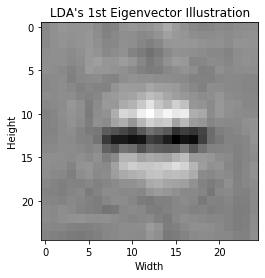

In [26]:
# Get the first and second eigenvectors
first_eigenVector = lda.scalings_[:, 0]
second_eigenVector = lda.scalings_[:, 1]

# Get the Fisherface
Fisherface_1 = pca.inverse_transform(first_eigenVector)
Fisherface_2 = pca.inverse_transform(second_eigenVector)

# Illustrate the 1st Eigenvector of LDA
print("LDA's 1st Eigenvector:\n", first_eigenVector)
plt.title("LDA's 1st Eigenvector Illustration")
plt.xlabel("Width")
plt.ylabel("Height")
plt.imshow(Fisherface_1.reshape((img_size, img_size)), cmap ='gray')
plt.show()

LDA's 2nd Eigenvector:
 [ 0.00583374 -0.06850922 -0.05521733  0.00285296  0.31400536 -0.21233371
 -0.24589856  0.30502795  0.13663682  0.05066559  0.28449933 -0.63002975
  0.60974334 -0.94032512  2.02682844 -1.52692286  1.92999549 -0.1587126
  0.90745766 -0.84813311  0.7112735   0.28452083  0.14524421  0.10776787
 -0.02201662  0.26780417 -0.31551815  0.15864952 -0.03601579 -0.37755506
  0.23831951  0.80445416 -0.21636692 -0.31206182 -0.03112937 -0.67242164
 -0.38395553 -0.1371928  -0.46470449 -0.17523129 -0.51369271 -0.26906566
  0.22270884 -0.06607754  0.17540208  0.25075372  0.60814425 -0.00953622
 -0.35081487 -0.14861086 -0.6103466  -0.02608007  0.35394875  0.59060253
 -0.53579889 -0.25398956 -0.23204501 -0.05936088  0.15894516  0.17388726
 -0.18599854  0.34739729  0.136429   -0.14806789  0.35920694 -0.10849875
  0.0036123  -0.46834748 -0.11791117  0.11982869 -0.11734781 -0.00863435
  0.22310725 -0.19943186  0.23724138  0.16608492  0.02986398  0.07190105
 -0.23088042  0.05394038 -0.

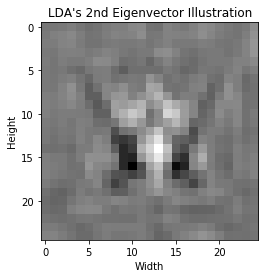

In [27]:
# Illustrate the 2nd Eigenvector of LDA
print("LDA's 2nd Eigenvector:\n", first_eigenVector)
plt.title("LDA's 2nd Eigenvector Illustration")
plt.xlabel("Width")
plt.ylabel("Height")
plt.imshow(Fisherface_2.reshape((img_size, img_size)), cmap ='gray')
plt.show()

**LDA Eigenvectors Explanation:**<br>
The LDA Eigenvectors are similar to PCA Eigenvectors, but LDA eigenvectors maximize the separation between classes of two different traffic signs during the training process. Hence, PCA-LDA for traffic sign recognition is far more superior than the PCA traffic sign recognition. However, LDA is more noise senstive and create blurry effects on the images as illustrated above.

9.) Apply Random Forest Classification to perform image recognition.

In [28]:
# Create Random Forest Classifier Object
RF_classifier = RandomForestClassifier()

# Fit the flatten train images with the train IDs
RF_classifier.fit(x_train, train_IDs)

# Predict the test set outcomes.
y_predict = RF_classifier.predict(x_test)

10.) Compute the combination of PCA and LDA recognition rates for the test set to report correct classification and incorrect classification.

Confusion Matrix: 

 [[  6  11   0 ...   0   0   0]
 [  0 230  29 ...   0   0   0]
 [  0  17 231 ...   0   0   0]
 ...
 [  0   1   0 ...   1   0   0]
 [  0   0   1 ...   0  20   0]
 [  0   0   0 ...   0   5  24]]


Classfication Report: 

               precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.76      0.79      0.77       291
           2       0.71      0.80      0.76       287
           3       0.74      0.80      0.77       174
           4       0.79      0.76      0.78       285
           5       0.61      0.62      0.61       234
           6       0.85      0.77      0.81        66
           7       0.76      0.70      0.73       185
           8       0.67      0.70      0.69       183
           9       0.92      0.95      0.94       191
          10       0.87      0.91      0.89       257
          11       0.82      0.87      0.84       165
          12       0.76      0.93      0.84       281
   

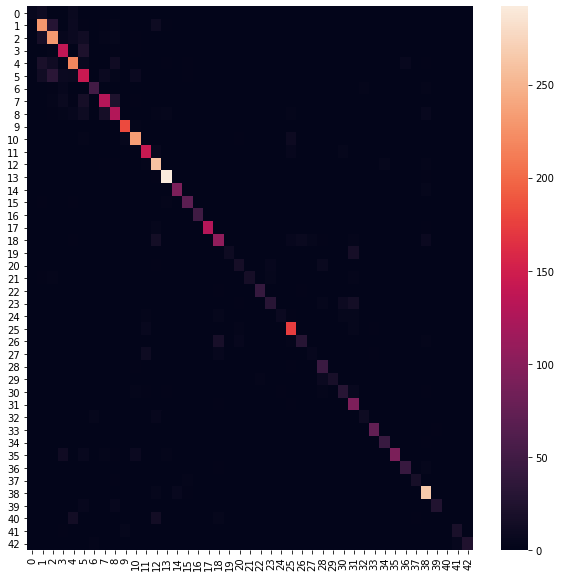

In [29]:
# Plot Confusion Matrix
Confusion_Matrix = confusion_matrix(test_IDs, y_predict)
print("Confusion Matrix: \n\n", Confusion_Matrix)

# Show Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Confusion_Matrix)

# Print Classification Report
print("\n\nClassfication Report: \n\n",classification_report(test_IDs,y_predict))

In [30]:
# Total Number of Test Images
total_num_test_imgs = np.sum(Confusion_Matrix)
# Total Number of Correct Classification
tot_num_correct_classification = np.trace(Confusion_Matrix)
# Total Number of Incorrect Classification
tot_num_incorrect_classification = total_num_test_imgs - tot_num_correct_classification

# Print Recognition Rate Report
print('Total Number of Test Images: ', total_num_test_imgs)
print("Total Number of Correct Classifications: ", tot_num_correct_classification)
print("Total Number of Incorrect Classifications: ", tot_num_incorrect_classification)
print('\nAccuracy Score: ' + str(accuracy_score(test_IDs, y_predict)*100) + ' %')

Total Number of Test Images:  5000
Total Number of Correct Classifications:  3970
Total Number of Incorrect Classifications:  1030

Accuracy Score: 79.4 %


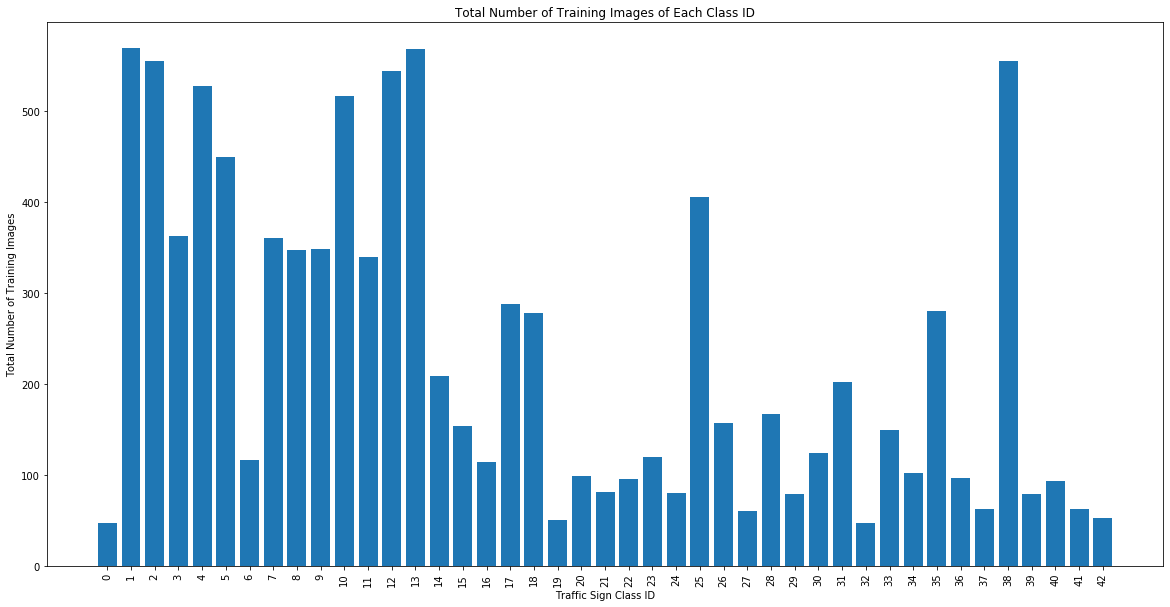

In [31]:
class_IDs_freq = np.zeros((1, nClasses))

# Store train images into the train images list
for idx in range(0, len(train_subset_df)):
    
    # Get the ClassID
    train_class_ID = train_subset_df['ClassId'][idx]
    # Count the numbers of different Class ID
    class_IDs_freq[0, train_class_ID] = class_IDs_freq[0, train_class_ID] + 1

plt.figure(figsize=(20,10))
plt.title('Total Number of Training Images of Each Class ID')
plt.ylabel('Total Number of Training Images')
plt.xlabel('Traffic Sign Class ID')
plt.bar(class_IDs, class_IDs_freq[0])
plt.xticks(class_IDs, rotation='vertical')
plt.show()

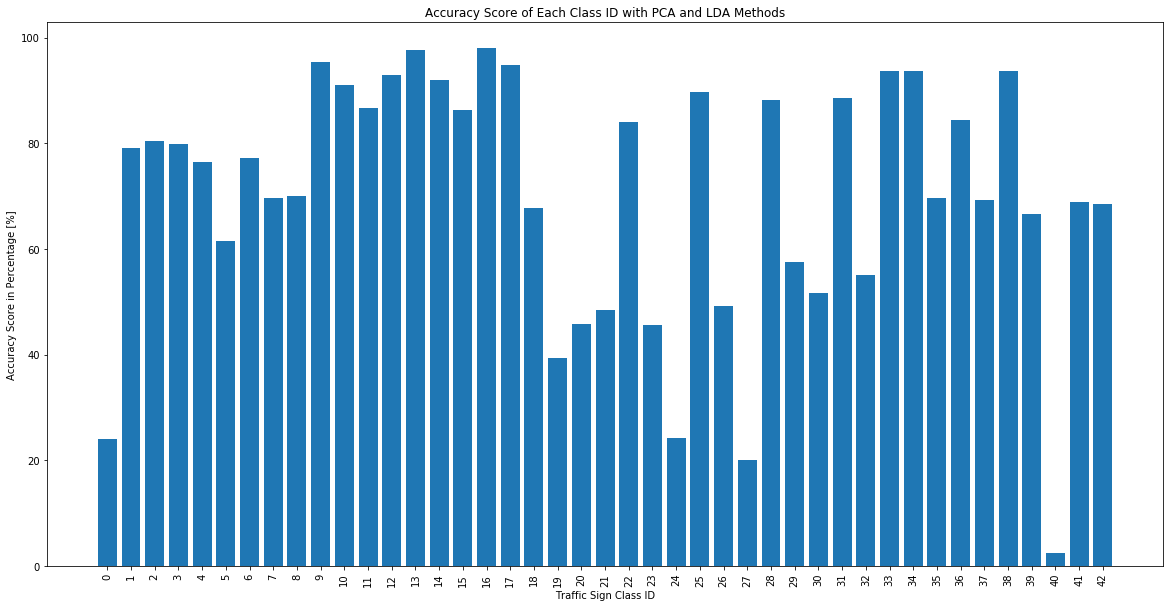

In [32]:
class_IDs_accuracy_score = np.zeros((1, nClasses))

# Calculate the correct classification percentage of each class
for idx in range(0, Confusion_Matrix.shape[0]):
    
    # Get the the sum of Class IDs
    sum_of_IDs = np.sum(Confusion_Matrix[idx,:])
    
    # Get the accuracy score in percentage
    class_IDs_accuracy_score[0, idx] = Confusion_Matrix[idx,idx] / sum_of_IDs * 100

plt.figure(figsize=(20,10))
plt.title('Accuracy Score of Each Class ID with PCA and LDA Methods')
plt.ylabel('Accuracy Score in Percentage [%]')
plt.xlabel('Traffic Sign Class ID')
plt.bar(class_IDs, class_IDs_accuracy_score[0])
plt.xticks(class_IDs, rotation='vertical')
plt.show()

**Suggestion to Improve the PCA-LDA Recognition Rate**

According to the Total Number of Training Images of Each Class ID bar graph and the Accuracy Score of Each Class ID with PCA-LDA Methods bar graph, the higher the number of the training images of a traffic sign class ID as shown above, the better the accuracy score of a traffic sign class ID. Hence, one of the suggestions to improve the recognition rate of the PCA-LDA is to increase the number of training images of certain class IDs that have a lower percentage of correct classification. Cropping the image to the region of interest would help to increase the recognition rate because it removes irrelevant features in the image. Overall, using the PCA-LDA methods for image recognition has a 22.46% higher recognition rate than the PCA method only for image recognition given that both have the same number of components, which is 108, and use the same image classifier, which is the Random Forest Classifier.